In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('WineQuality.csv')
wine.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [3]:
wine.shape

(32485, 14)

In [4]:
# Dropped unnecessary columns
wine = wine.drop(wine.columns[0], axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [5]:
# Converting categorical columns into numerical columns

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
wine['Type'] = enc.fit_transform(wine['Type'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,1
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,1
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,1
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,1
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,1


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 3.2 MB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698,0.752747
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474,0.431421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


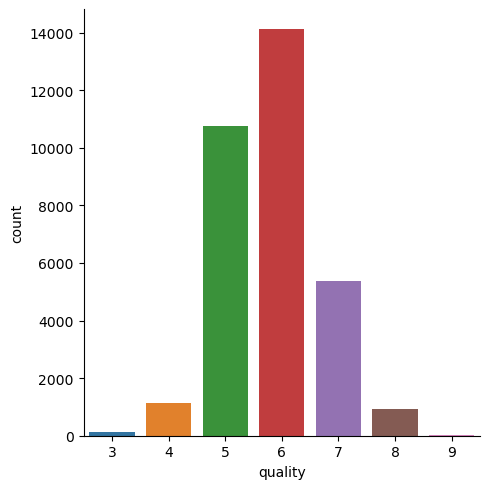

In [9]:
sns.catplot(x='quality', data = wine, kind = 'count')

<Axes: >

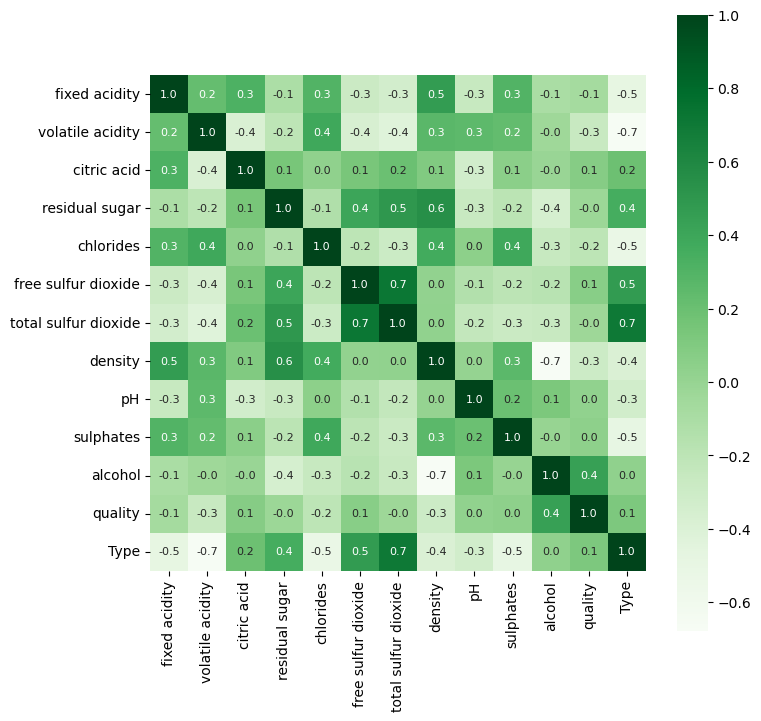

In [10]:
correlation = wine.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

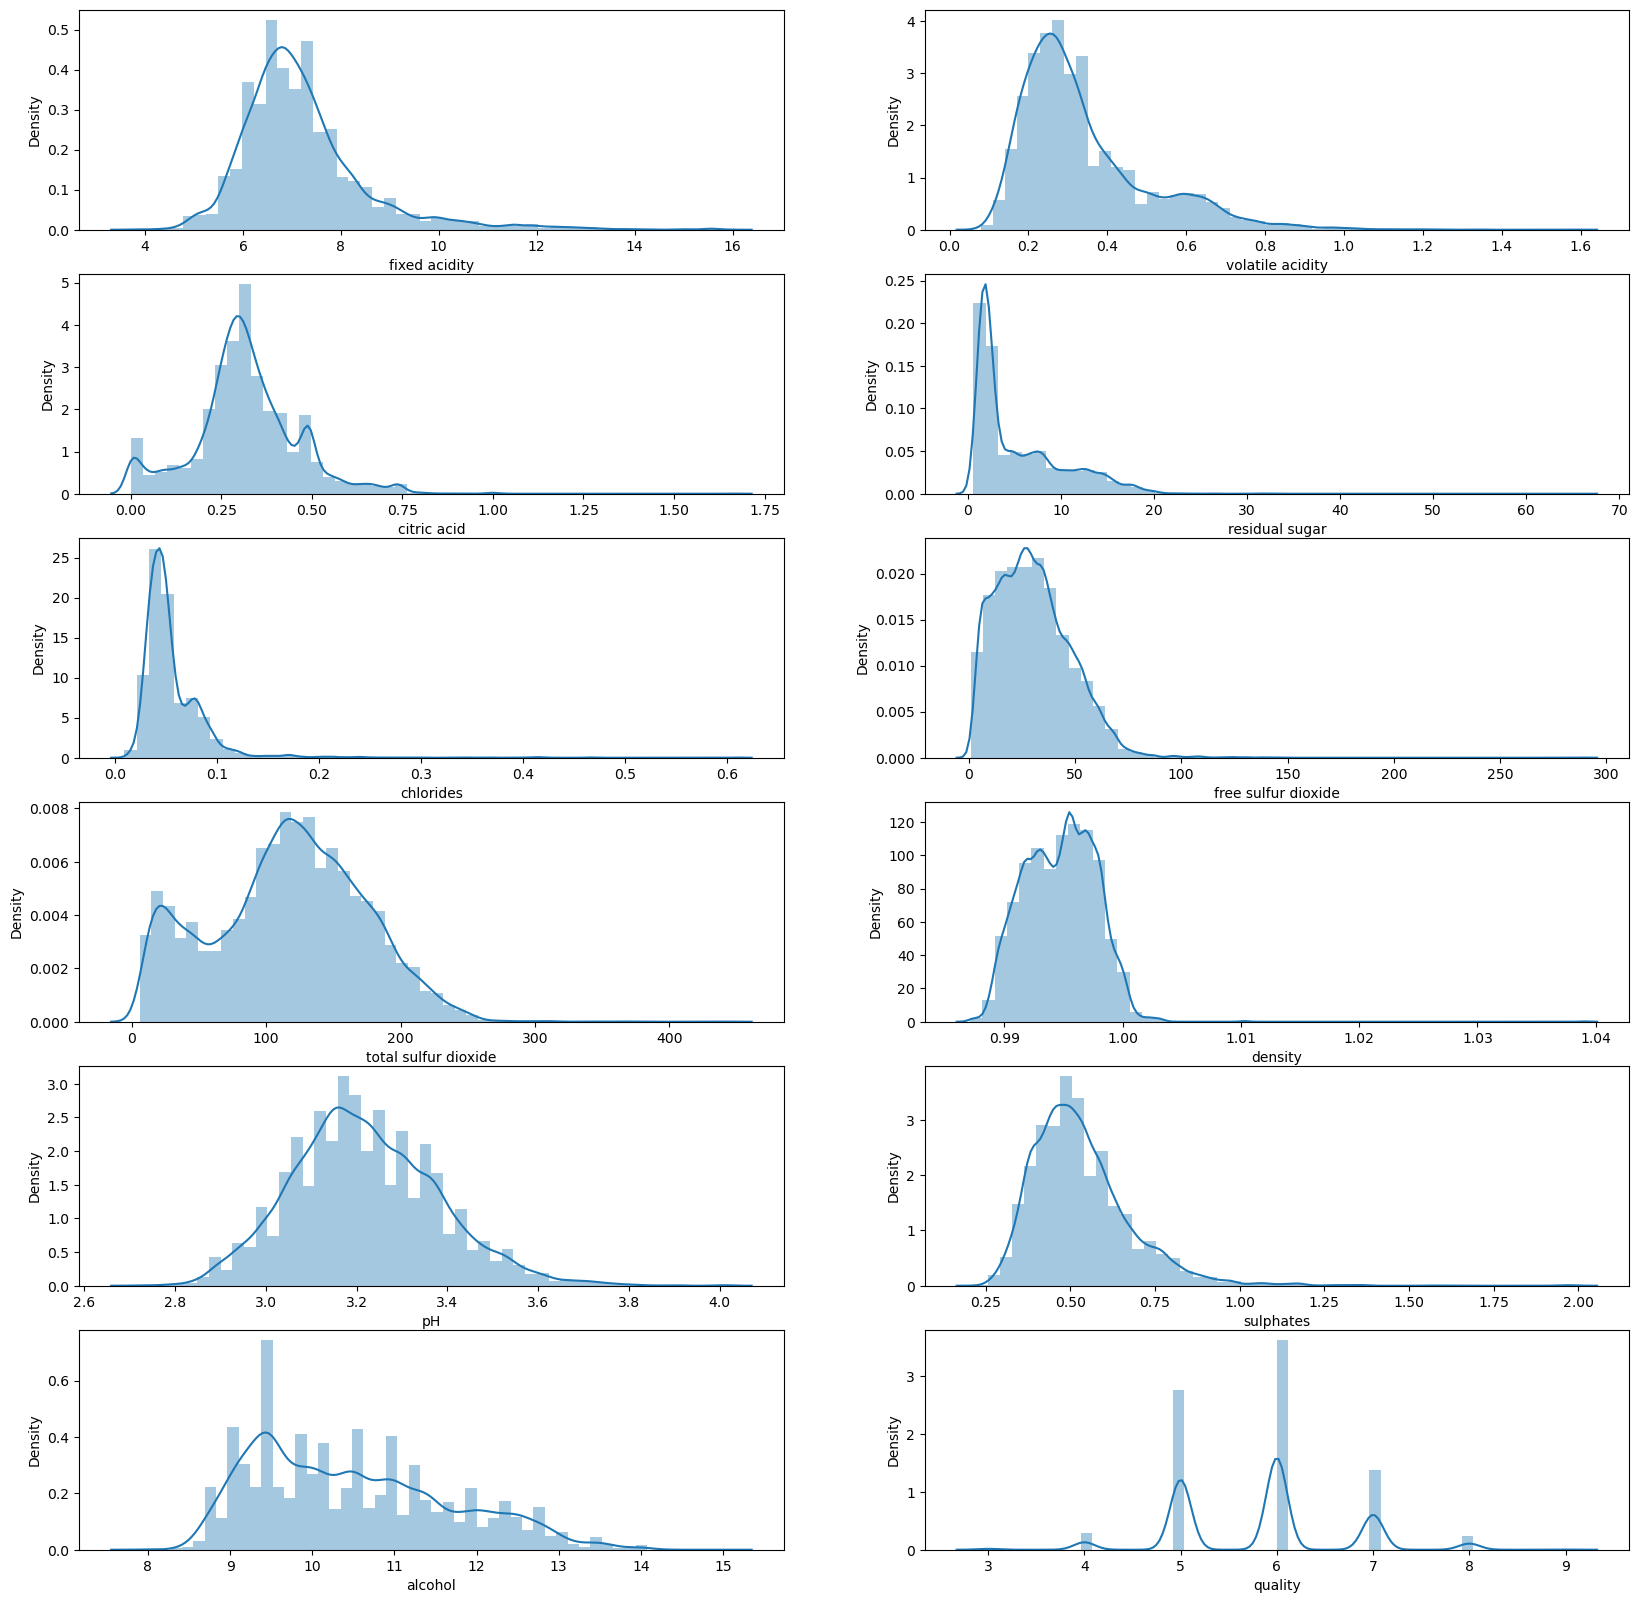

In [11]:
figure, ax = plt.subplots(nrows = 6, ncols = 2)    
ax = ax.flatten()         
figure.set_size_inches(20,20)

for ax, col in zip(ax, wine.columns):
  sns.distplot(wine[col], ax = ax)